In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MEAO = pd.read_excel('G:\Priyabrata\ML\Material data repository.xlsx')
INPUT=MEAO.iloc[:,2:11]  #all INPUT (Variables)
TARGET=MEAO.iloc[:,20]   #all PHASES SS,SS+IM,AM
#TARGET = MEAO.iloc[:,19]

Y=MEAO.iloc[:,22] #coded phases. 0:SS, 1:SS+IM, 2:AM
#Y = MEAO.iloc[:,23] #coded phases. 0:MSS, 1:SSS, 2:SS+IM, 3:AM

#drop mixing enthalpy
selected_INPUT1 = INPUT.drop(['Mixing entropy','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT1

normalized_INPUT1=(selected_INPUT1-selected_INPUT1.mean())/selected_INPUT1.std()
normalized_INPUT1

,Ω,Atomic size mismatch,Λ
0,-0.631404,0.027946,-0.209450
1,-0.618275,-0.029515,-0.206598
2,-0.584828,-0.102026,-0.203809
3,-0.549350,-0.195605,-0.201020
4,-0.508245,-0.314359,-0.197724
...,...,...,...
241,-0.336948,-0.190571,-0.189724
242,-0.333822,-0.138336,-0.193755
243,-0.332368,-0.089138,-0.197356
244,-0.440570,-0.993250,0.104887


f1 macro: 0.850 (0.049)

Maximum f1 score:  0.9585858585858587

Minimum f1 score:  0.7406896551724138


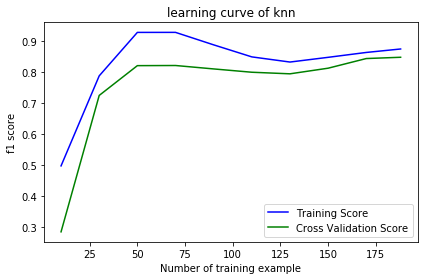

In [2]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT1, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT1, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


f1 macro: 0.730 (0.056)

Maximum f1 score:  0.8490507314036725

Minimum f1 score:  0.5584185929013515


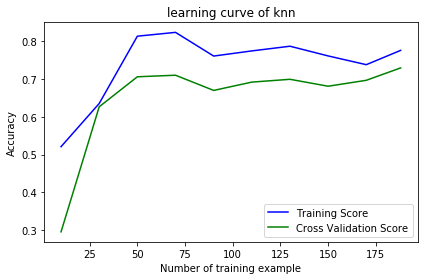

In [3]:
#drop Atomic size mismatch
selected_INPUT2 = INPUT.drop(['Mixing entropy','Atomic size mismatch','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT2

normalized_INPUT2=(selected_INPUT2-selected_INPUT2.mean())/selected_INPUT2.std()
normalized_INPUT2

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT2, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))


from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT2, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


f1 macro: 0.876 (0.049)

Maximum f1 score:  0.9769916594765603

Minimum f1 score:  0.775


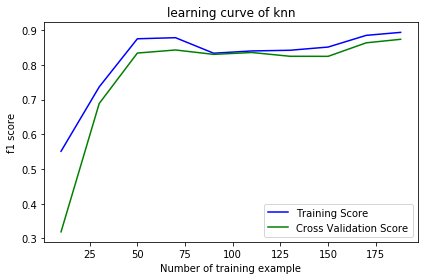

In [19]:
#drop Λ
selected_INPUT3 = INPUT.drop(['Mixing entropy','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT3

normalized_INPUT3=(selected_INPUT3-selected_INPUT3.mean())/selected_INPUT3.std()
normalized_INPUT3

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT3, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT3, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("f1 score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

f1 macro: 0.860 (0.045)

Maximum f1 score:  0.9395725865880619

Minimum f1 score:  0.7558878982520052


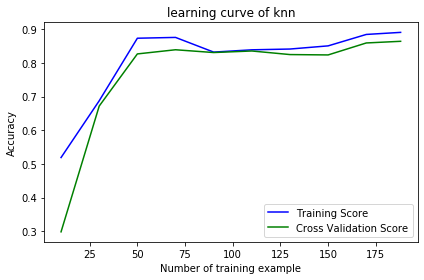

In [5]:
#drop Ω
selected_INPUT4 = INPUT.drop(['Mixing entropy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT4

normalized_INPUT4=(selected_INPUT4-selected_INPUT4.mean())/selected_INPUT4.std()
normalized_INPUT4

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT4, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT4, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

f1 macro: 0.720 (0.059)

Maximum f1 score:  0.8506375227686703

Minimum f1 score:  0.6030212407024002


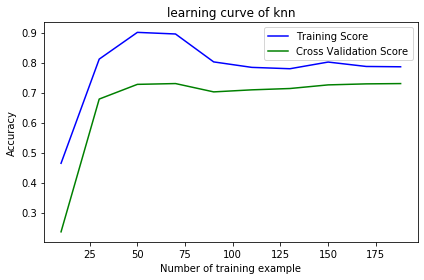

In [6]:
#drop atomic size mismatch and mixing enthalpy and Ω
selected_INPUT5 = INPUT.drop(['Mixing entropy','Mixing enthalpy','Atomic size mismatch','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT5, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [7]:
#drop Λ and omega
selected_INPUT6 = INPUT.drop(['Mixing entropy','Λ','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT6

normalized_INPUT6=(selected_INPUT6-selected_INPUT6.mean())/selected_INPUT6.std()
normalized_INPUT6

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT6, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))



f1 macro: 0.861 (0.044)

Maximum f1 score:  0.9395725865880619

Minimum f1 score:  0.7558878982520052


f1 macro: 0.710 (0.058)

Maximum f1 score:  0.8100217864923748

Minimum f1 score:  0.5817460317460318


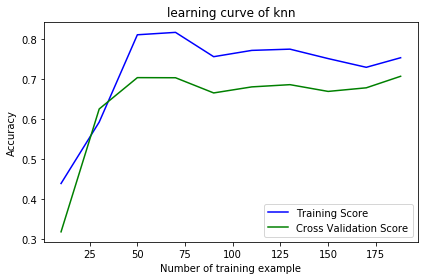

In [8]:
#Keep mixing enthalpy
selected_INPUT5 = INPUT.drop(['Mixing entropy','Λ','Atomic size mismatch','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT5, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT5, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

f1 macro: 0.725 (0.058)

Maximum f1 score:  0.8268476621417798

Minimum f1 score:  0.5982042648709315


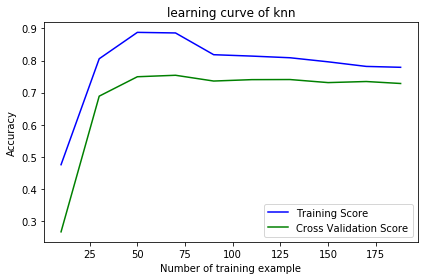

In [10]:
#Keep atomic size mismatch
selected_INPUT7 = INPUT.drop(['Mixing entropy','Λ','Mixing enthalpy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT7

normalized_INPUT7=(selected_INPUT7-selected_INPUT7.mean())/selected_INPUT7.std()
normalized_INPUT7

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT7, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(model, normalized_INPUT7, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]


A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of knn")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [12]:
#Keep Λ
selected_INPUT8 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Mixing enthalpy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT8, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

f1 macro: 0.720 (0.059)

Maximum f1 score:  0.8506375227686703

Minimum f1 score:  0.6030212407024002


In [13]:
#Keep Ω
selected_INPUT8 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Mixing enthalpy','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT8, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

f1 macro: 0.668 (0.054)

Maximum f1 score:  0.7992530345471521

Minimum f1 score:  0.5175983436853002


In [14]:
#drop Atomic size mismatch and Ω
selected_INPUT9 = INPUT.drop(['Mixing entropy','Atomic size mismatch','γ','Ω','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT9

normalized_INPUT9=(selected_INPUT9-selected_INPUT9.mean())/selected_INPUT9.std()
normalized_INPUT9

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT9, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))


f1 macro: 0.724 (0.056)

Maximum f1 score:  0.8401559454191033

Minimum f1 score:  0.5584185929013515


In [15]:
#drop Atomic size mismatch and Λ
selected_INPUT10 = INPUT.drop(['Mixing entropy','Atomic size mismatch','γ','Λ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT10

normalized_INPUT10=(selected_INPUT10-selected_INPUT10.mean())/selected_INPUT10.std()
normalized_INPUT10

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1,n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT10, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

f1 macro: 0.715 (0.059)

Maximum f1 score:  0.8286354704003931

Minimum f1 score:  0.5817460317460318


In [16]:
#drop mixing enthalpy and Λ
selected_INPUT11 = INPUT.drop(['Mixing entropy','Mixing enthalpy','γ','Λ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT11

normalized_INPUT11=(selected_INPUT11-selected_INPUT11.mean())/selected_INPUT11.std()
normalized_INPUT11

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT11, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

f1 macro: 0.852 (0.048)

Maximum f1 score:  0.9585858585858587

Minimum f1 score:  0.7406896551724138


In [17]:
#drop mixing enthalpy and Ω
selected_INPUT12 = INPUT.drop(['Mixing entropy','Mixing enthalpy','γ','Ω','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT12

normalized_INPUT12=(selected_INPUT12-selected_INPUT12.mean())/selected_INPUT12.std()
normalized_INPUT12

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT12, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

f1 macro: 0.723 (0.054)

Maximum f1 score:  0.8268476621417798

Minimum f1 score:  0.5982042648709315


In [18]:
#drop mixing enthalpy and atomic size mismatch
selected_INPUT13 = INPUT.drop(['Mixing entropy','Mixing enthalpy','γ','Atomic size mismatch','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT13

normalized_INPUT13=(selected_INPUT13-selected_INPUT13.mean())/selected_INPUT13.std()
normalized_INPUT13

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
model = KNeighborsClassifier(metric='minkowski',metric_params=None, n_jobs=-1, n_neighbors=7, p=10,weights='uniform')
scores = cross_val_score(model, normalized_INPUT13, Y, scoring='f1_macro', cv=nskf, n_jobs=-1)
scores
# report performance
print('f1 macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

f1 macro: 0.793 (0.057)

Maximum f1 score:  0.9164054336468129

Minimum f1 score:  0.6614097968936679
